In [2]:
import numpy as np
import cv2
import os
from tqdm import tqdm
import keras
from keras.preprocessing.image import *
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
from keras.models import load_model


Using TensorFlow backend.


In [14]:
img_path = './dataset/dataset/'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        img_path,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

train_generator[1][0][0].shape

Found 8464 images belonging to 4 classes.


(150, 150, 3)

In [4]:
batch_size = 32
num_classes = 4
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')

learning_rate = 0.1

In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [19]:
model.fit_generator(
        train_generator,
        steps_per_epoch=50,
        epochs=10,
        validation_steps=50)

Epoch 1/10
50/50 [==============================] - ETA: 1:43 - loss: 0.3363 - acc: 0.875 - ETA: 1:30 - loss: 0.2634 - acc: 0.906 - ETA: 1:20 - loss: 0.2829 - acc: 0.916 - ETA: 1:16 - loss: 0.2989 - acc: 0.890 - ETA: 1:13 - loss: 0.3260 - acc: 0.900 - ETA: 1:11 - loss: 0.3267 - acc: 0.890 - ETA: 1:09 - loss: 0.2867 - acc: 0.906 - ETA: 1:07 - loss: 0.3077 - acc: 0.910 - ETA: 1:05 - loss: 0.2924 - acc: 0.916 - ETA: 1:04 - loss: 0.2732 - acc: 0.925 - ETA: 1:02 - loss: 0.2665 - acc: 0.923 - ETA: 1:01 - loss: 0.2718 - acc: 0.924 - ETA: 1:00 - loss: 0.2833 - acc: 0.923 - ETA: 58s - loss: 0.2813 - acc: 0.924 - ETA: 56s - loss: 0.2750 - acc: 0.92 - ETA: 55s - loss: 0.2648 - acc: 0.92 - ETA: 53s - loss: 0.2584 - acc: 0.92 - ETA: 51s - loss: 0.2501 - acc: 0.92 - ETA: 49s - loss: 0.2420 - acc: 0.92 - ETA: 48s - loss: 0.2397 - acc: 0.92 - ETA: 46s - loss: 0.2346 - acc: 0.92 - ETA: 44s - loss: 0.2419 - acc: 0.92 - ETA: 43s - loss: 0.2422 - acc: 0.92 - ETA: 41s - loss: 0.2525 - acc: 0.91 - ETA: 39s 

50/50 [==============================] - ETA: 1:15 - loss: 0.1900 - acc: 0.937 - ETA: 1:14 - loss: 0.1989 - acc: 0.890 - ETA: 1:16 - loss: 0.3006 - acc: 0.895 - ETA: 1:15 - loss: 0.2807 - acc: 0.906 - ETA: 1:15 - loss: 0.3121 - acc: 0.893 - ETA: 1:15 - loss: 0.3250 - acc: 0.869 - ETA: 1:15 - loss: 0.2872 - acc: 0.883 - ETA: 1:14 - loss: 0.2711 - acc: 0.890 - ETA: 1:12 - loss: 0.2717 - acc: 0.892 - ETA: 1:11 - loss: 0.2845 - acc: 0.887 - ETA: 1:08 - loss: 0.4494 - acc: 0.866 - ETA: 1:07 - loss: 0.4879 - acc: 0.867 - ETA: 1:05 - loss: 0.4612 - acc: 0.872 - ETA: 1:02 - loss: 0.4408 - acc: 0.872 - ETA: 1:00 - loss: 0.4152 - acc: 0.879 - ETA: 58s - loss: 0.4003 - acc: 0.882 - ETA: 57s - loss: 0.3890 - acc: 0.88 - ETA: 55s - loss: 0.3709 - acc: 0.89 - ETA: 54s - loss: 0.3606 - acc: 0.89 - ETA: 52s - loss: 0.3532 - acc: 0.89 - ETA: 51s - loss: 0.3774 - acc: 0.89 - ETA: 50s - loss: 0.3758 - acc: 0.90 - ETA: 49s - loss: 0.3729 - acc: 0.90 - ETA: 47s - loss: 0.3602 - acc: 0.90 - ETA: 46s - loss:

In [5]:
model_path = 'model_save.h5'
model.save(model_path)
print('Saved trained model at %s ' % model_path)

NameError: name 'model' is not defined

In [6]:
model = load_model(model_path)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


# Visualization

In [60]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


Populating the interactive namespace from numpy and matplotlib


In [54]:
def name_to_code(name):
    if 'broadleaf':
        return np.array([1,0,0,0])
    elif 'grass':
        return np.array([0,1,0,0])
    elif 'soil':
        return np.array([0,0,1,0])
    else:
        # soybean
        return np.array([0,0,0,1])
    
def code_to_name(code):
    if (code == 0):
        return 'broadleaf'
    elif (code == 1):
        return 'grass'
    elif (code == 2):
        return 'soil'
    else:
        return 'soybean'

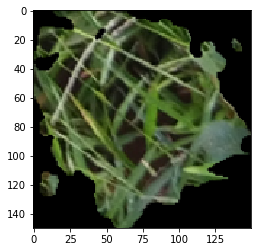

Actual value
grass
Predicted value
grass


In [57]:
def visualize(img_index):
    img = train_generator[1][0][img_index]
    imgplot = plt.imshow(img)
    plt.show()
    print("Actual value")
    print(code_to_name(np.argmax(train_generator[0][1][img_index])))
    print("Predicted value")
    output = model.predict(img[np.newaxis])[0]
    rounded = [int(x) for x in output]
    print(code_to_name(np.argmax(output)))
visualize(2)

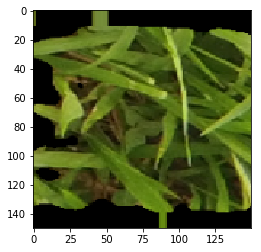

Actual value
soil
Predicted value
grass


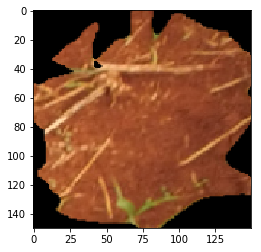

Actual value
grass
Predicted value
soil


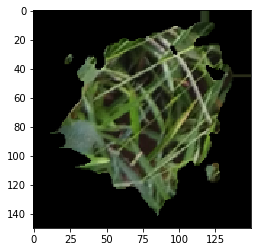

Actual value
grass
Predicted value
broadleaf


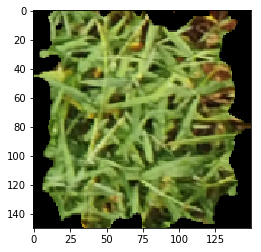

Actual value
soil
Predicted value
grass


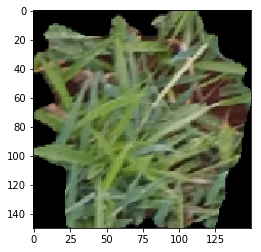

Actual value
soil
Predicted value
grass


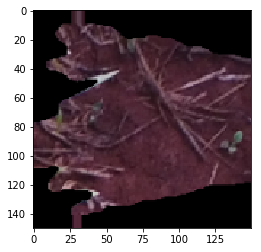

Actual value
grass
Predicted value
soil


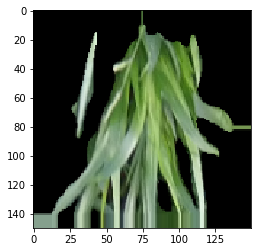

Actual value
grass
Predicted value
grass


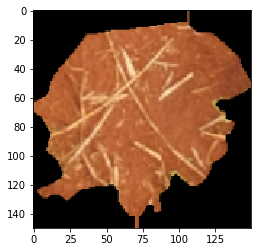

Actual value
grass
Predicted value
soil


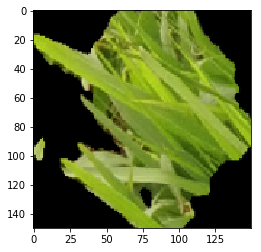

Actual value
grass
Predicted value
grass


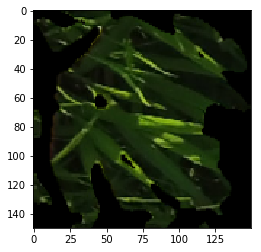

Actual value
broadleaf
Predicted value
grass


In [59]:
for x in range(10):
    visualize(x)